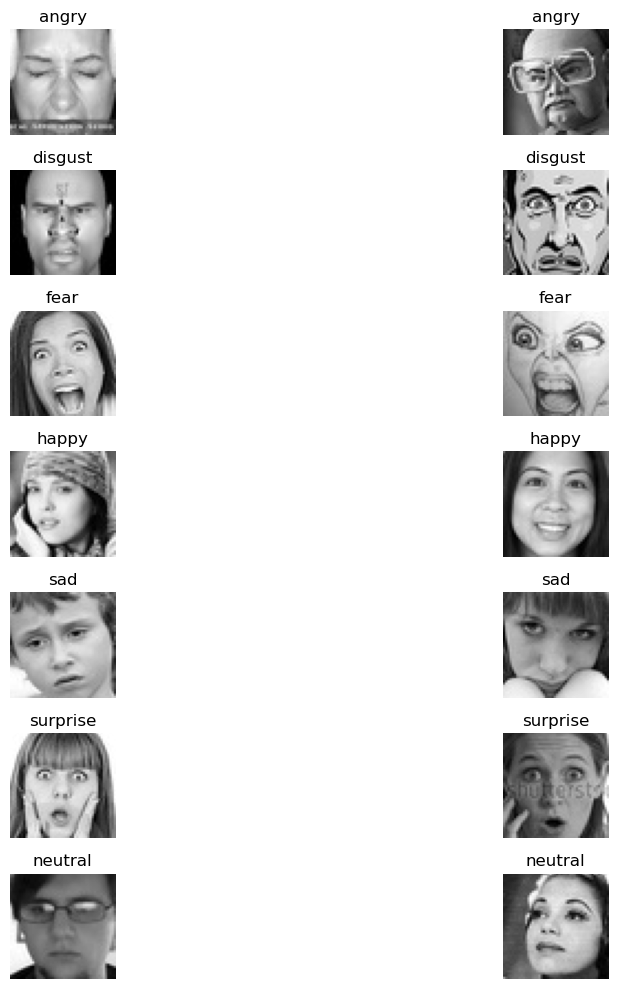

In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
#dataset path
dataset_path = "C:\Users\Hp\Documents\Python_Pro\Emo_detet\FER-2013"

#Categories
categories = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

#figure size
plt.figure(figsize=(14, 10))


for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, "train", category)  
    images = os.listdir(category_path)

   
    selected_images = random.sample(images, 2)

    for j, img_name in enumerate(selected_images):
        img_path = os.path.join(category_path, img_name)
        img = Image.open(img_path)

        plt.subplot(len(categories), 2, i * 2 + j + 1)
        plt.imshow(img, cmap='gray')  # FER-2013 is usually grayscale
        plt.title(f"{category}")
        plt.axis("off")

plt.tight_layout()
plt.show()


In [9]:
import os
import pandas as pd
import numpy as np
from PIL import Image

# dataset path 
dataset_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\FER-2013"

# Categories
categories = ["angry", "disgust", "fear", "happy", "sad", "surprise", "neutral"]

# Extracted features
features_list = []

# Loop through categories
for category in categories:
    category_path = os.path.join(dataset_path, "train", category) 
    images = os.listdir(category_path)

    for img_name in images:
        img_path = os.path.join(category_path, img_name)
        
        # Open image
        img = Image.open(img_path).convert("L")  # Convert to grayscale
        
        # Convert to NumPy array
        img_array = np.array(img)

        # Extract features
        height, width = img_array.shape  # Image dimensions
        aspect_ratio = width / height  # Aspect ratio
        mean_intensity = img_array.mean()  # Mean pixel intensity
        std_intensity = img_array.std()  # Standard deviation of intensity
        
        # Store features
        features_list.append([img_name, category, height, width, aspect_ratio, mean_intensity, std_intensity])

# Create DataFrame
df_features = pd.DataFrame(features_list, columns=["Image_Name", "Category", "Height", "Width", "Aspect_Ratio", "Mean_Intensity", "Std_Intensity"])

# Save extracted features
features_file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\fer_extracted_features.csv"
df_features.to_csv(features_file_path, index=False)

print(f"Extracted features saved to: {features_file_path}")
print(df_features.head())  # Display first few rows


Extracted features saved to: C:\Users\Hp\Documents\Python_Pro\Emo_detet\fer_extracted_features.csv
              Image_Name Category  Height  Width  Aspect_Ratio  \
0  Training_10118481.jpg    angry      48     48           1.0   
1  Training_10120469.jpg    angry      48     48           1.0   
2  Training_10131352.jpg    angry      48     48           1.0   
3  Training_10161559.jpg    angry      48     48           1.0   
4   Training_1021836.jpg    angry      48     48           1.0   

   Mean_Intensity  Std_Intensity  
0      106.000434      51.089565  
1       98.207899      69.560679  
2        0.000000       0.000000  
3      116.586806      51.400206  
4      163.680122      39.017364  


Columns in the dataset: Index(['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp'], dtype='object')


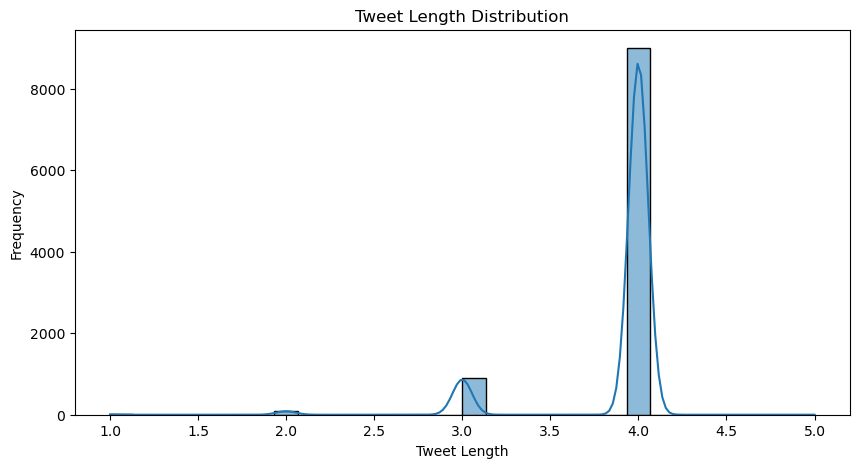

No 'sentiment' column found.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#file path
file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\Tweetalytics Analyzing Trends and Patterns in a Twitter Dataset\twitter_dataset.csv"

# Read the dataset
df = pd.read_csv(file_path, encoding="utf-8")  # Adjust encoding if needed

# Display column names
print("Columns in the dataset:", df.columns)

useful_file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\cleaned_twitter_dataset.csv"
df.to_csv(useful_file_path, index=False)

# Identify the correct column for tweets
tweet_col = None
for col in df.columns:
    if "tweet" in col.lower() or "text" in col.lower() or "content" in col.lower():
        tweet_col = col
        break

if tweet_col:
    # Plot Tweet Length Distribution
    df["tweet_length"] = df[tweet_col].astype(str).apply(len)
    plt.figure(figsize=(10, 5))
    sns.histplot(df["tweet_length"], bins=30, kde=True)
    plt.title("Tweet Length Distribution")
    plt.xlabel("Tweet Length")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No column found for tweet content.")

# Count Plot of Sentiments (if applicable)
if "sentiment" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df["sentiment"], palette="viridis")
    plt.title("Sentiment Distribution")
    plt.xlabel("Sentiment")
    plt.ylabel("Count")
    plt.show()
else:
    print("No 'sentiment' column found.")


In [7]:
import pandas as pd

# File path
file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\Tweetalytics Analyzing Trends and Patterns in a Twitter Dataset\twitter_dataset.csv"

# Read the dataset
df = pd.read_csv(file_path, encoding="utf-8")

# Extract features
df_features = pd.DataFrame()

df_features["Tweet_ID"] = df["Tweet_ID"]  # Keep the ID
df_features["Tweet_Length"] = df["Text"].astype(str).apply(len)  # Character count
df_features["Word_Count"] = df["Text"].astype(str).apply(lambda x: len(x.split()))  # Word count
df_features["Hashtag_Count"] = df["Text"].astype(str).apply(lambda x: x.count("#"))  # Number of hashtags
df_features["Mention_Count"] = df["Text"].astype(str).apply(lambda x: x.count("@"))  # Number of mentions
df_features["Retweets"] = df["Retweets"]  # Keep retweets
df_features["Likes"] = df["Likes"]  # Keep likes

# Extract Hour of the Day from Timestamp (if Timestamp is in datetime format)
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')  # Convert to datetime
df_features["Hour"] = df["Timestamp"].dt.hour  # Extract hour

# Save extracted features
features_file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\extracted_tweet_features.csv"
df_features.to_csv(features_file_path, index=False)

print(f"Extracted features saved to: {features_file_path}")
print(df_features.head())  # Display first few rows


Extracted features saved to: C:\Users\Hp\Documents\Python_Pro\Emo_detet\extracted_tweet_features.csv
   Tweet_ID  Tweet_Length  Word_Count  Hashtag_Count  Mention_Count  Retweets  \
0         1           241          34              0              0         2   
1         2           190          30              0              0        35   
2         3           219          33              0              0        51   
3         4           201          29              0              0        37   
4         5           274          39              0              0        27   

   Likes  Hour  
0     25    11  
1     29    22  
2     25    11  
3     18    22  
4     80     7  


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load Tweet Features
tweet_features_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\extracted_tweet_features.csv"
df_tweet = pd.read_csv(tweet_features_path)

# Load Image Features
image_features_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\fer_extracted_features.csv"
df_image = pd.read_csv(image_features_path)

# Initialize scaler
scaler = MinMaxScaler()

# Separate numeric and non-numeric data
tweet_numeric = df_tweet.select_dtypes(include=['int64', 'float64'])
tweet_other = df_tweet.select_dtypes(exclude=['int64', 'float64'])

image_numeric = df_image.select_dtypes(include=['int64', 'float64'])
image_other = df_image.select_dtypes(exclude=['int64', 'float64'])

# Scale numeric features
tweet_scaled = pd.DataFrame(scaler.fit_transform(tweet_numeric), columns=tweet_numeric.columns)
image_scaled = pd.DataFrame(scaler.fit_transform(image_numeric), columns=image_numeric.columns)

# Add back the non-numeric info (if any), like label or ID
df_tweet_scaled = pd.concat([tweet_scaled, tweet_other.reset_index(drop=True)], axis=1)
df_image_scaled = pd.concat([image_scaled, image_other.reset_index(drop=True)], axis=1)

# Add source label
df_tweet_scaled["Source"] = "Tweet"
df_image_scaled["Source"] = "Image"

# Feature fusion - Combine both DataFrames
df_fusion = pd.concat([df_tweet_scaled, df_image_scaled], ignore_index=True)

# View the first few rows
print("Fused Data Preview:")
print(df_fusion.head())


Fused Data Preview:
   Tweet_ID  Tweet_Length  Word_Count  Hashtag_Count  Mention_Count  Retweets  \
0    0.0000      0.806122    0.611111            0.0            0.0      0.02   
1    0.0001      0.545918    0.500000            0.0            0.0      0.35   
2    0.0002      0.693878    0.583333            0.0            0.0      0.51   
3    0.0003      0.602041    0.472222            0.0            0.0      0.37   
4    0.0004      0.974490    0.750000            0.0            0.0      0.27   

   Likes      Hour Source  Height  Width  Aspect_Ratio  Mean_Intensity  \
0   0.25  0.478261  Tweet     NaN    NaN           NaN             NaN   
1   0.29  0.956522  Tweet     NaN    NaN           NaN             NaN   
2   0.25  0.478261  Tweet     NaN    NaN           NaN             NaN   
3   0.18  0.956522  Tweet     NaN    NaN           NaN             NaN   
4   0.80  0.304348  Tweet     NaN    NaN           NaN             NaN   

   Std_Intensity Image_Name Category  
0        

In [3]:
fusion_file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\feature_fusion_dataset_.csv"
df_fusion.to_csv(fusion_file_path, index=False)
print(f"Feature fusion dataset saved to: {fusion_file_path}")


Feature fusion dataset saved to: C:\Users\Hp\Documents\Python_Pro\Emo_detet\feature_fusion_dataset_.csv


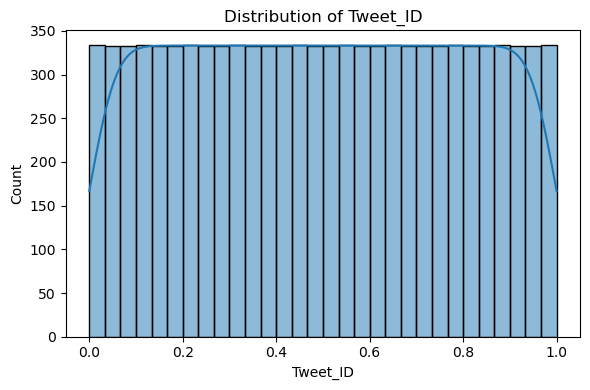

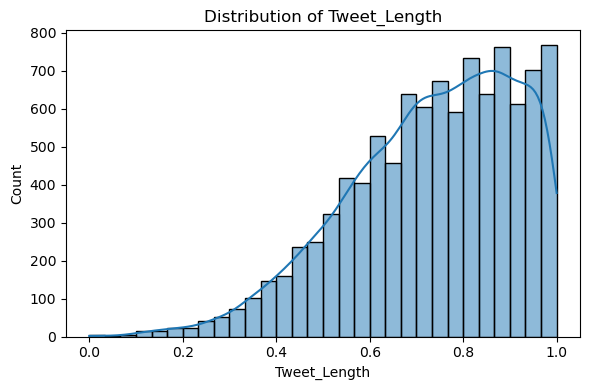

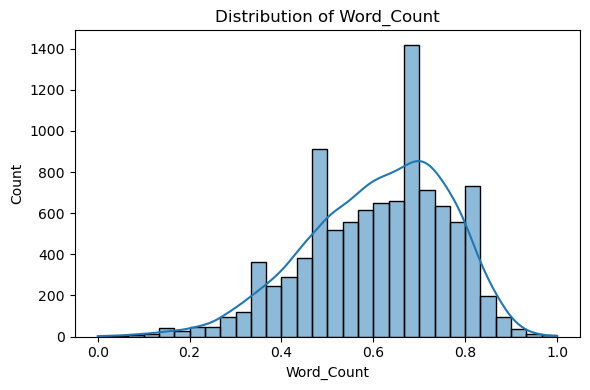

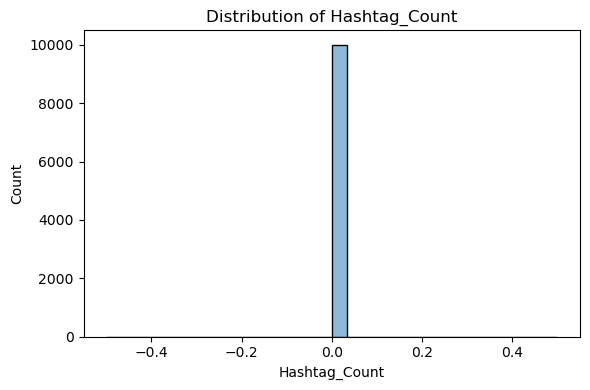

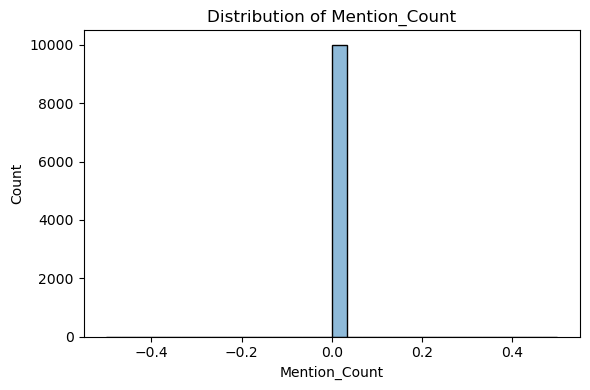

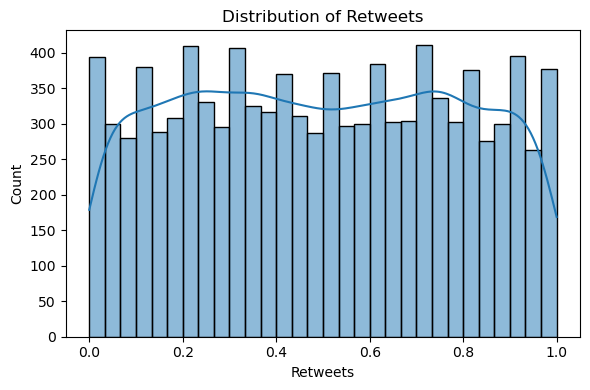

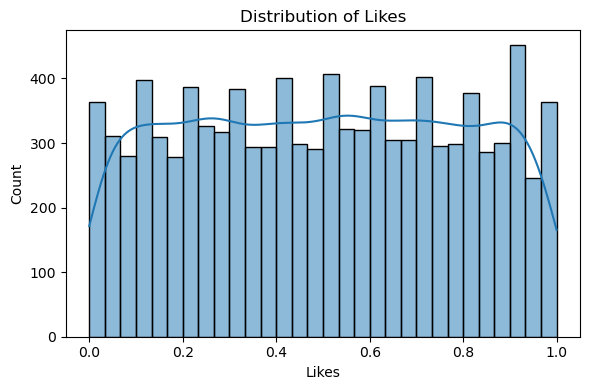

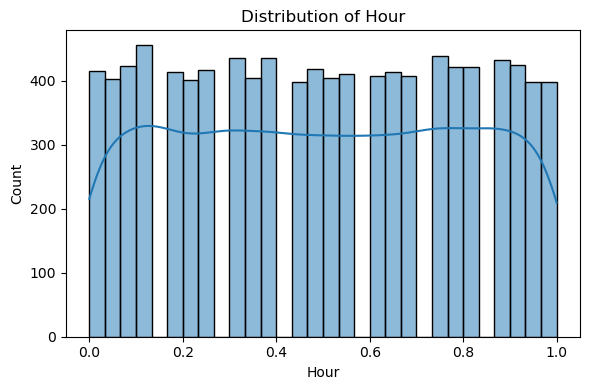

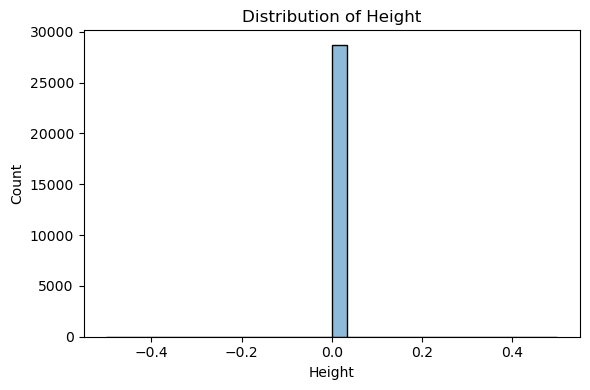

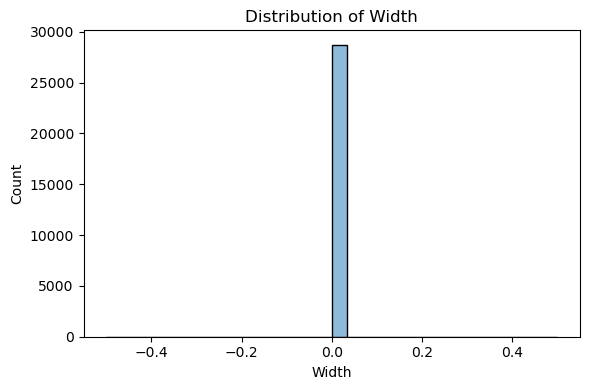

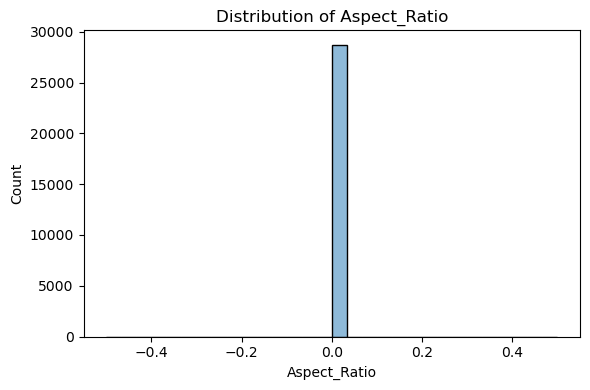

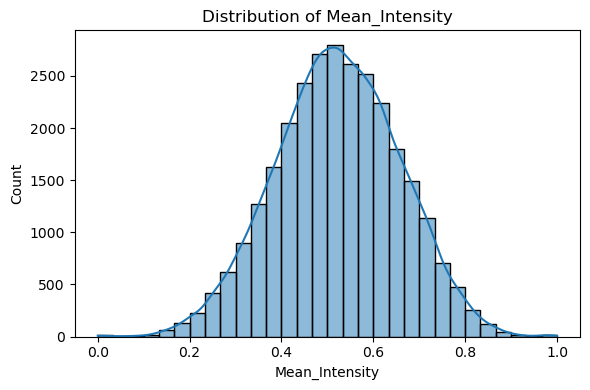

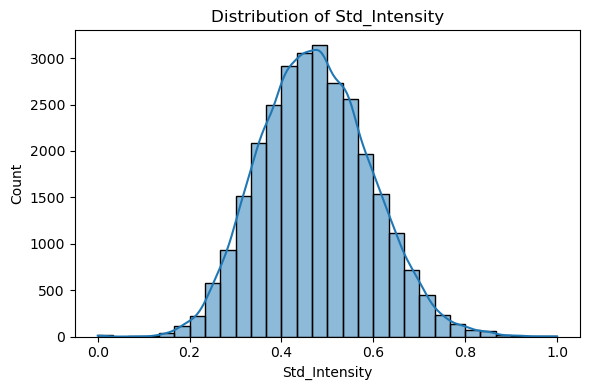

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the fused dataset
fusion_file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\feature_fusion_dataset_.csv"
df_fusion = pd.read_csv(fusion_file_path)

numeric_cols = df_fusion.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_fusion, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


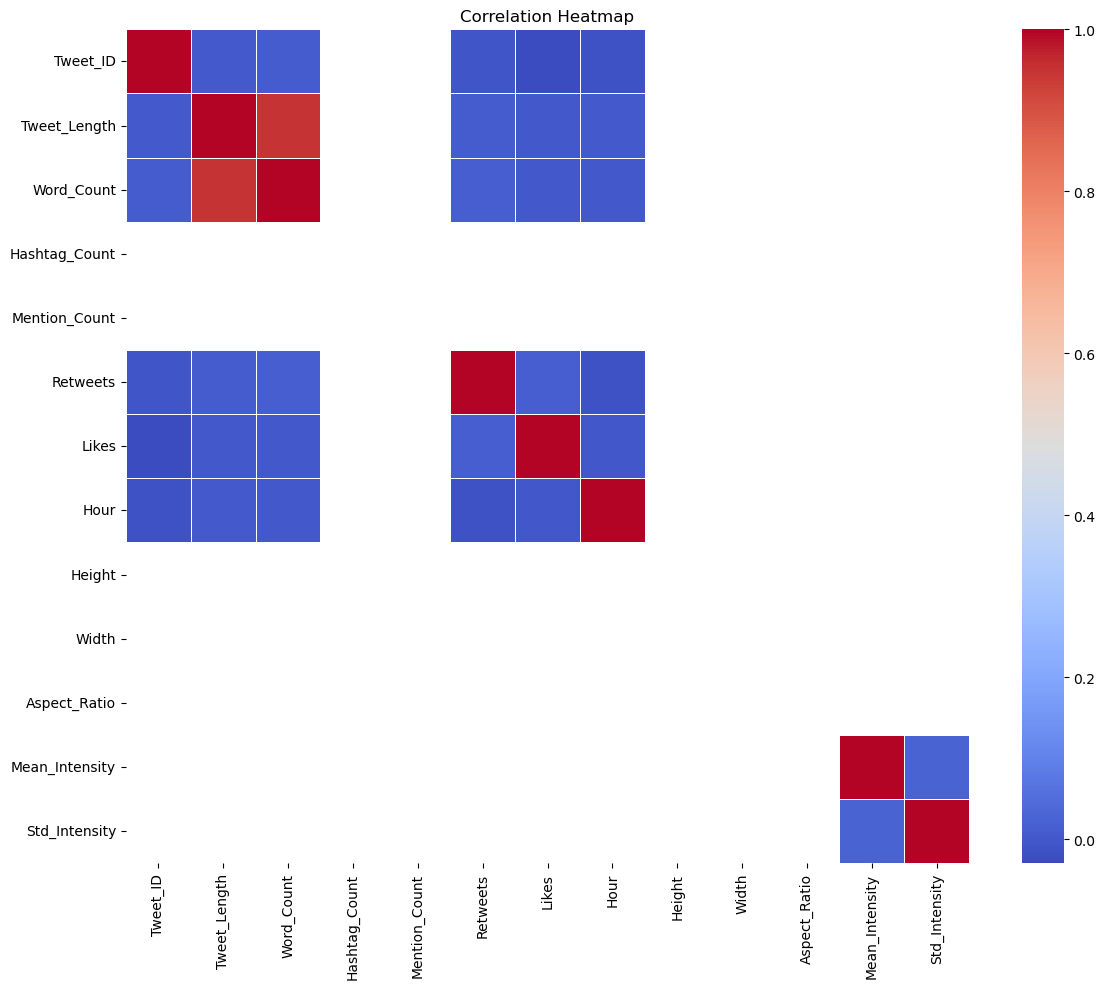

In [11]:
plt.figure(figsize=(12, 10))
corr_matrix = df_fusion[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


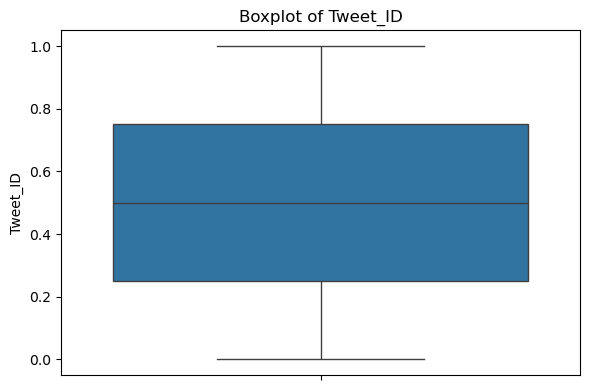

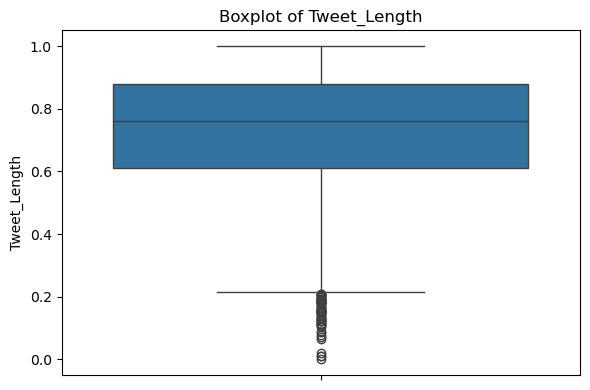

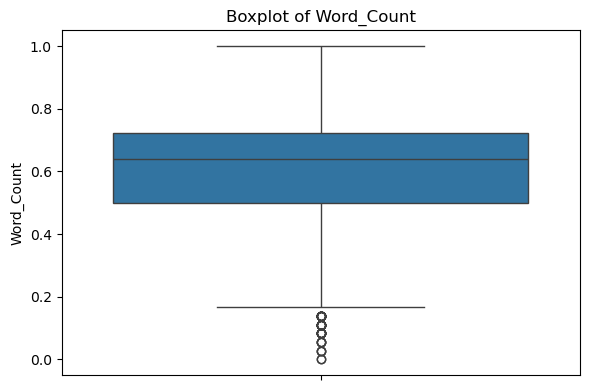

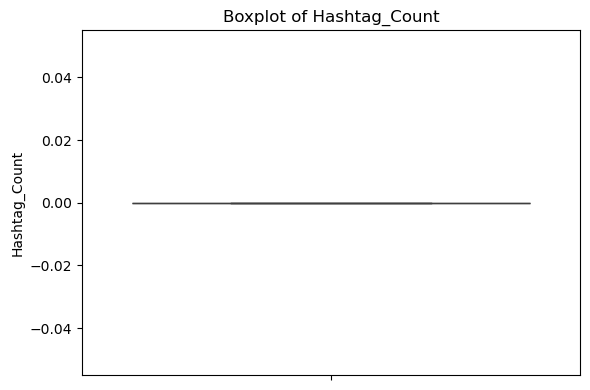

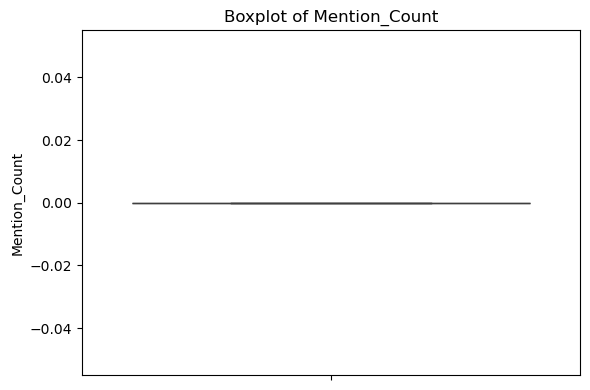

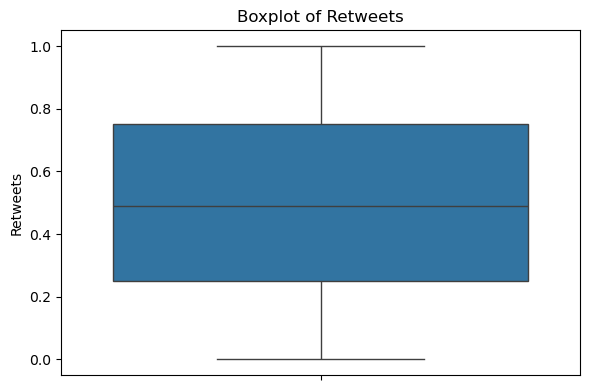

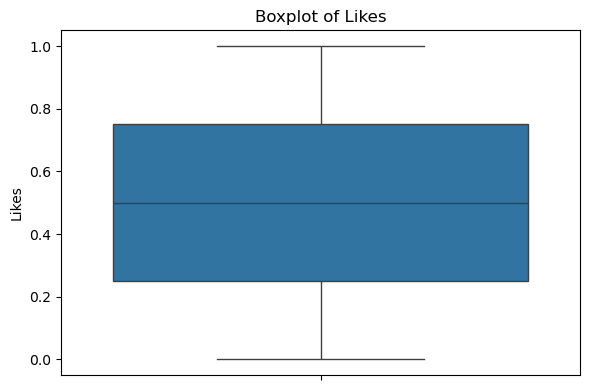

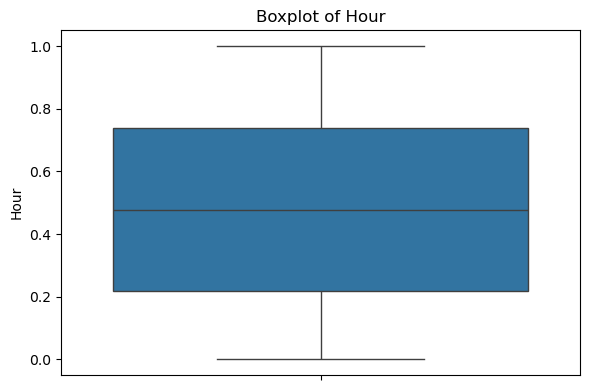

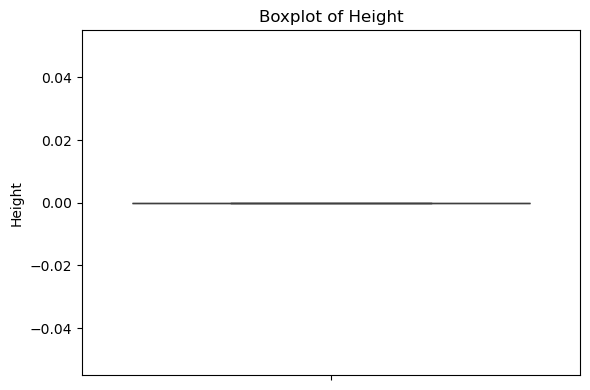

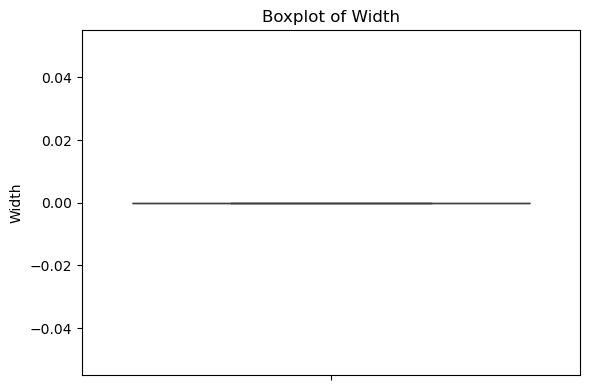

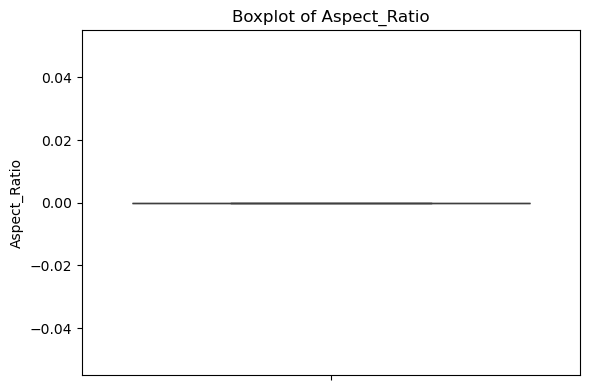

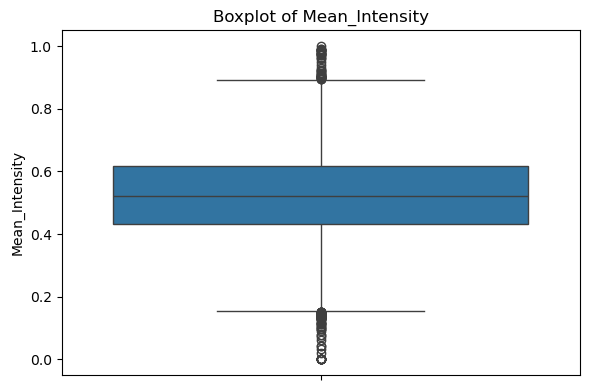

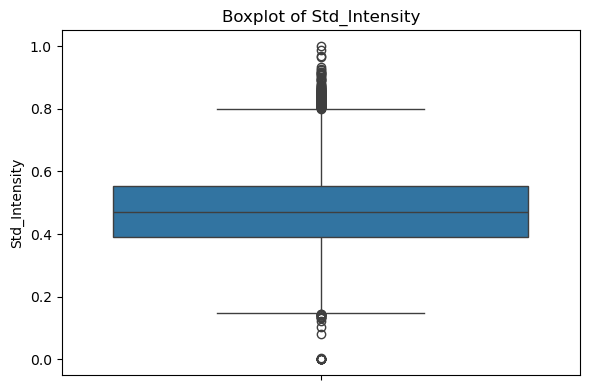

In [13]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_fusion, y=col)
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


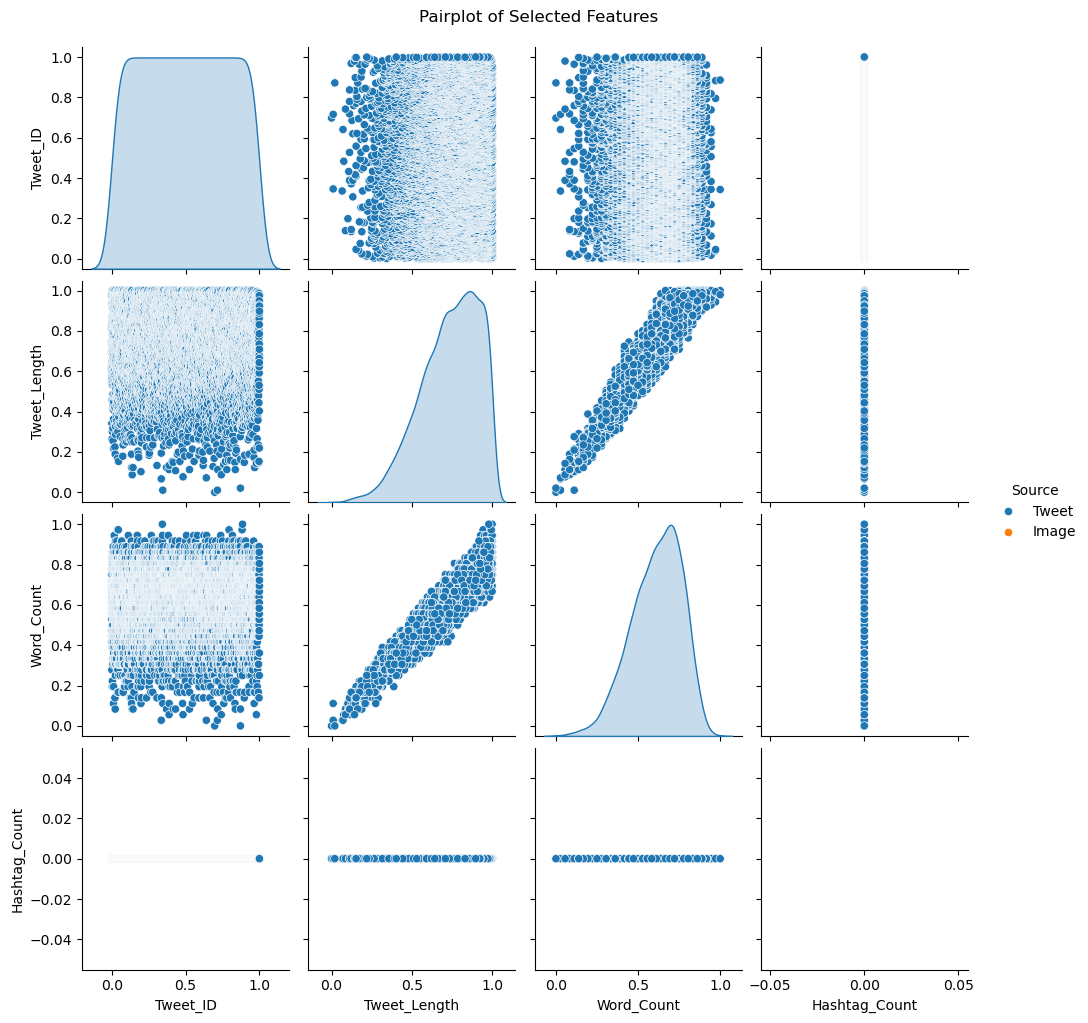

In [15]:
subset_cols = numeric_cols[:4].tolist() + ['Source']  # Add 'Source' for hue
sns.pairplot(df_fusion[subset_cols], hue='Source', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


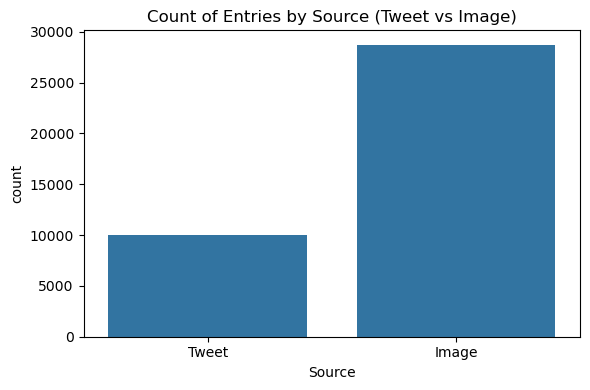

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_fusion, x='Source')
plt.title("Count of Entries by Source (Tweet vs Image)")
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the fused dataset
fusion_file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\feature_fusion_dataset.csv"
df_fusion = pd.read_csv(fusion_file_path)

# Drop non-numeric columns 
df_numeric = df_fusion.select_dtypes(include=[float, int])

# Separate features and target
if 'label' in df_numeric.columns:
    X = df_numeric.drop('label', axis=1)
    y = df_numeric['label']
else:
   
    import numpy as np
    df_numeric['label'] = np.random.choice([0, 1], size=len(df_numeric))
    X = df_numeric.drop('label', axis=1)
    y = df_numeric['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

imputer = SimpleImputer(strategy='mean')

# Fit on training data and transform both train and test sets
X_train_txt_imputed = imputer.fit_transform(X_train_txt)
X_test_txt_imputed = imputer.transform(X_test_txt)

# Now train the model
model_txt = LogisticRegression(max_iter=12000)
model_txt.fit(X_train_txt_imputed, y_train)
pred_txt = model_txt.predict_proba(X_test_txt_imputed)


In [41]:
import numpy as np
from sklearn.metrics import accuracy_score

# Combine predictions (late fusion)
pred_fused = (pred_txt + pred_img) / 2

# Convert probabilities to class labels 
final_preds = np.argmax(pred_fused, axis=1)

# Evaluate
accuracy = accuracy_score(y_test, final_preds)
print(f"Fused Model Accuracy: {accuracy:.4f}")


Fused Model Accuracy: 0.5080


In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_txt_imputed)

# DataFrame for easier plotting
import pandas as pd
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y_train


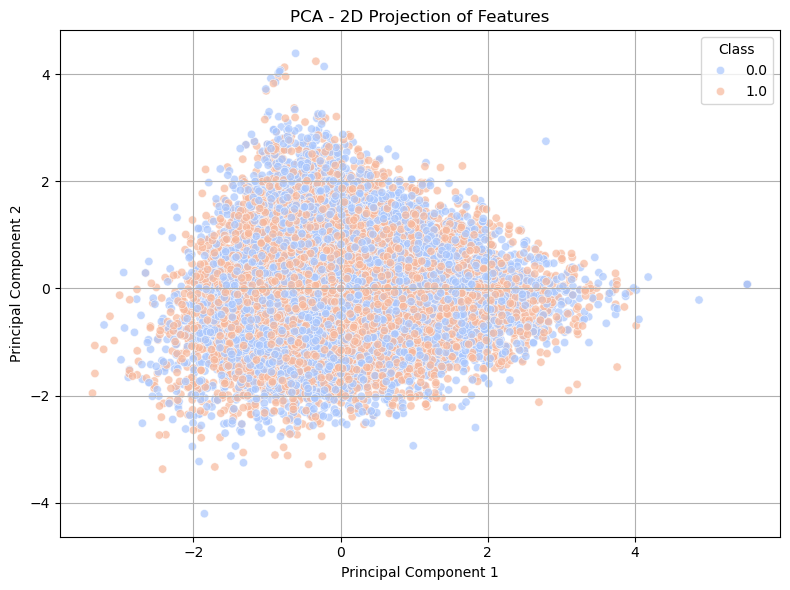

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='coolwarm', alpha=0.7)
plt.title('PCA - 2D Projection of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Class')
plt.tight_layout()
plt.show()


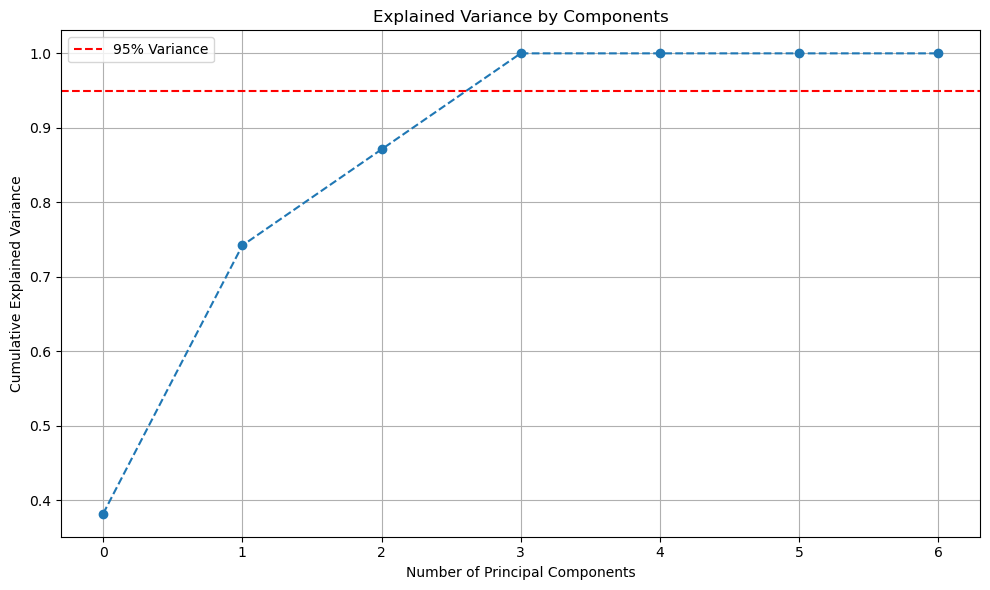

In [47]:
pca_full = PCA()
pca_full.fit(X_train_txt_imputed)

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(0.95, color='red', linestyle='--', label='95% Variance')
plt.legend()
plt.tight_layout()
plt.show()


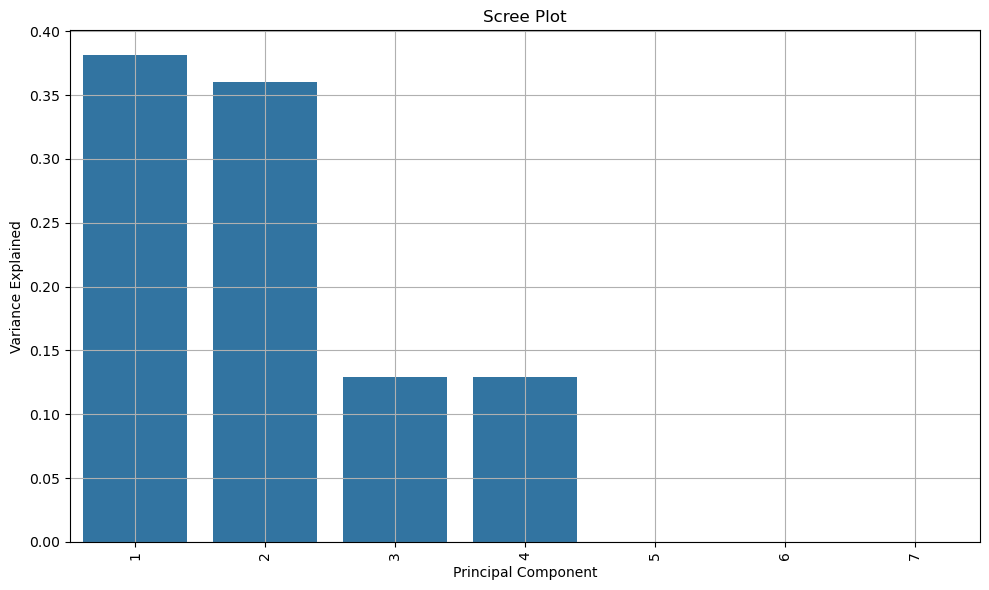

In [49]:
#Scree plot
plt.figure(figsize=(10,6))
sns.barplot(x=np.arange(1, len(pca_full.explained_variance_ratio_)+1),
            y=pca_full.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


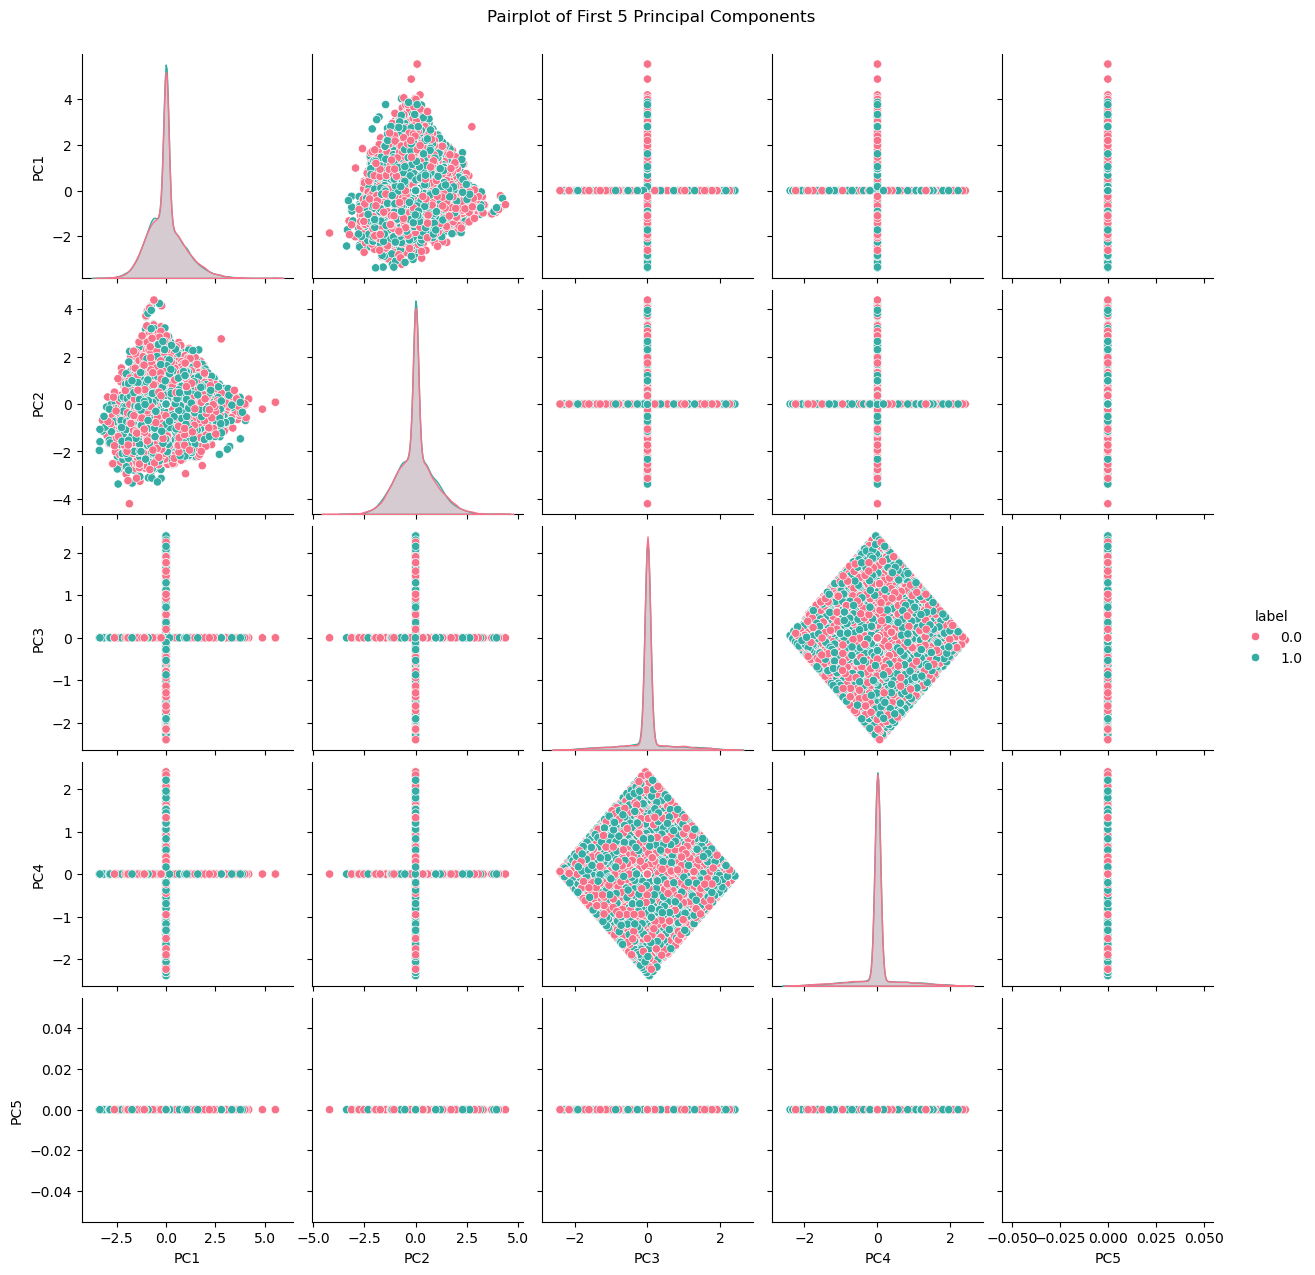

In [51]:
# Pairplot:
pca_5 = PCA(n_components=5)
X_pca_5 = pca_5.fit_transform(X_train_txt_imputed)
df_5 = pd.DataFrame(X_pca_5, columns=[f'PC{i+1}' for i in range(5)])
df_5['label'] = y_train

sns.pairplot(df_5, hue='label', palette='husl')
plt.suptitle('Pairplot of First 5 Principal Components', y=1.02)
plt.show()


In [ ]:
import pandas as pd

# Create DataFrame from PCA output
df_pca_output = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(5)])
df_pca_output['label'] = y_train.values  
# Save to CSV
df_pca_output.to_csv('PCA_emotion_dataset.csv', index=False)


In [3]:
import pandas as pd

# Load the dataset
fusion_file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\PCA_emotion_dataset.csv"
df_fusion = pd.read_csv(fusion_file_path)

# Show all columns
pd.set_option('display.max_columns', None)

# Display the first few rows
print(df_fusion.head())


   Tweet_Length  Word_Count  Hashtag_Count  Mention_Count  Retweets  Likes  \
0           100          10              8              3        97   4394   
1           237          15              8              6       888   4800   
2           160          12              2              5       593    133   
3           190          21              0              4       909   3254   
4            48          40              5              2       467    334   

   Hour  Source  Height  Width  Aspect_Ratio  Mean_Intensity  Std_Intensity  \
0    22       3     365   1295          0.76          237.11          63.33   
1     6       1     240    623          1.61           20.29          23.35   
2     8       1     538    487          1.60           63.31          71.68   
3    21       4     202   1545          0.92          253.80          93.42   
4    23       1    1084    283          0.94           27.91          64.38   

     Label  
0      sad  
1     fear  
2  disgust  
3   

In [15]:
import pandas as pd

# Load the dataset
fusion_file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\PCA_emotion_dataset.csv"
df_fusion = pd.read_csv(fusion_file_path)

# Show all column names
print("📌 All Columns:")
print(df_fusion.columns.tolist())

# Check unique labels (assuming the label column is named 'label')
if 'Label' in df_fusion.columns:
    print("\n🏷️ Unique Labels:")
    print(df_fusion['Label'].unique())
else:
    print("\n⚠️ No 'label' column found in the dataset.")


📌 All Columns:
['Tweet_Length', 'Word_Count', 'Hashtag_Count', 'Mention_Count', 'Retweets', 'Likes', 'Hour', 'Source', 'Height', 'Width', 'Aspect_Ratio', 'Mean_Intensity', 'Std_Intensity', 'Label']

🏷️ Unique Labels:
['sad' 'fear' 'disgust' 'angry' 'neutral' 'happy' 'surprise']


C:\Users\Hp\AppData\Local\Temp\ipykernel_26484\3939638498.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df_normalized, palette='Set2')


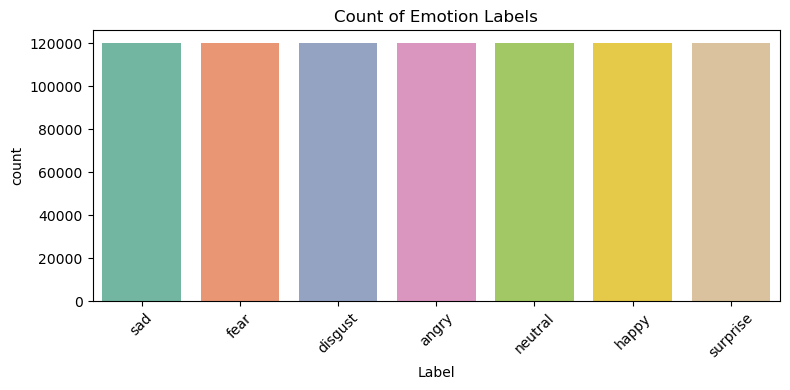

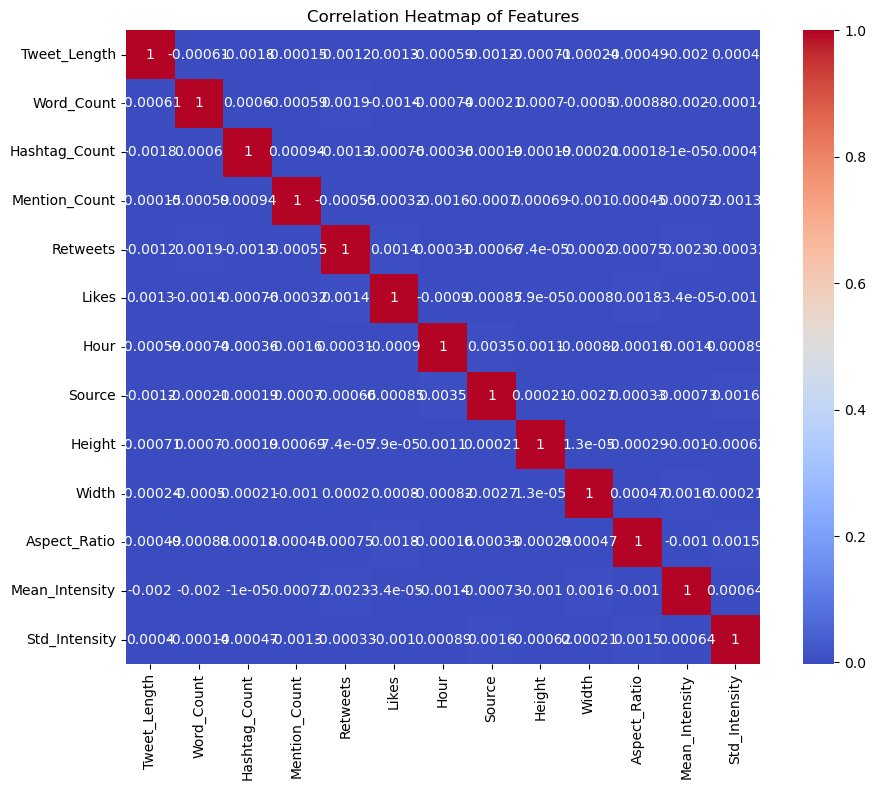

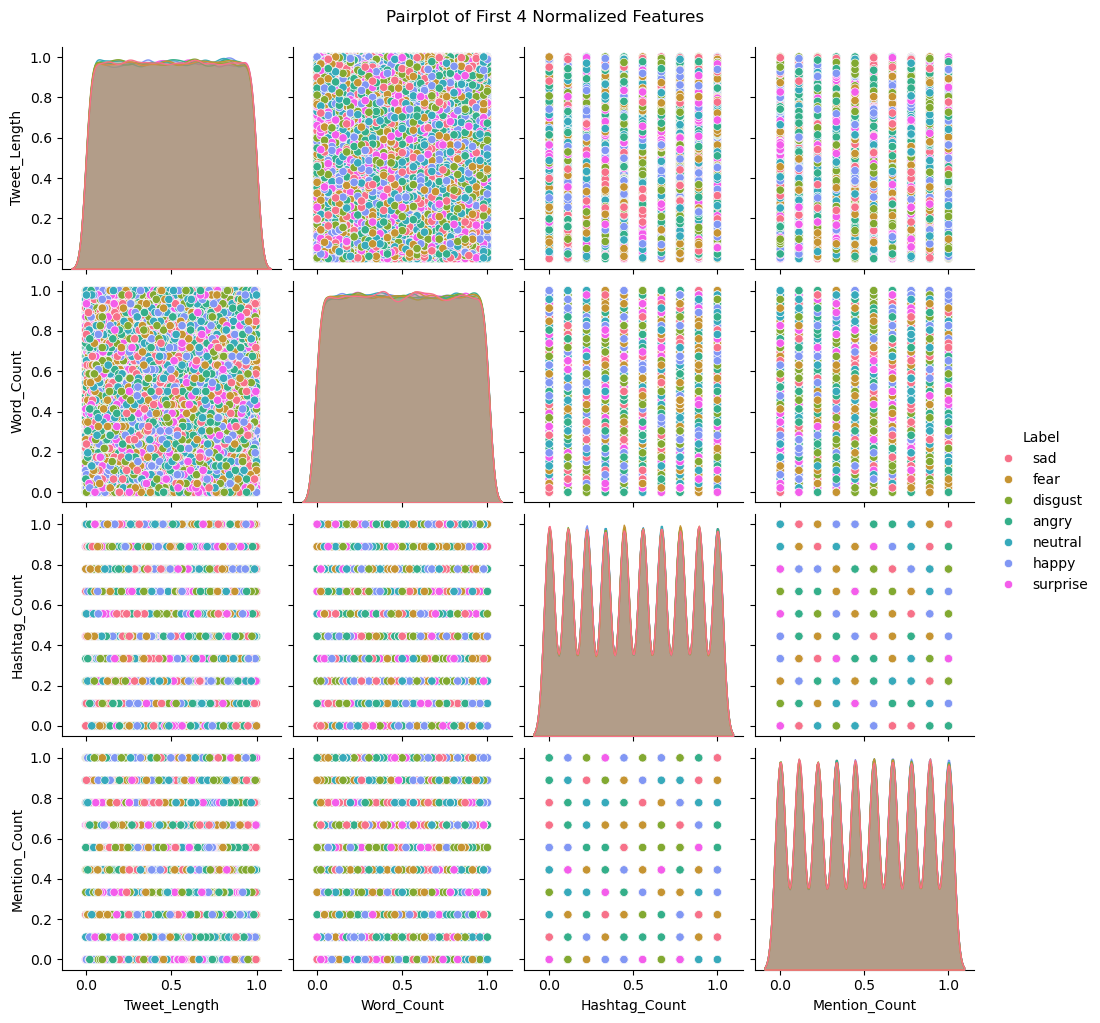

C:\Users\Hp\AppData\Local\Temp\ipykernel_26484\3939638498.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='Tweet_Length', data=df_normalized, palette='pastel')


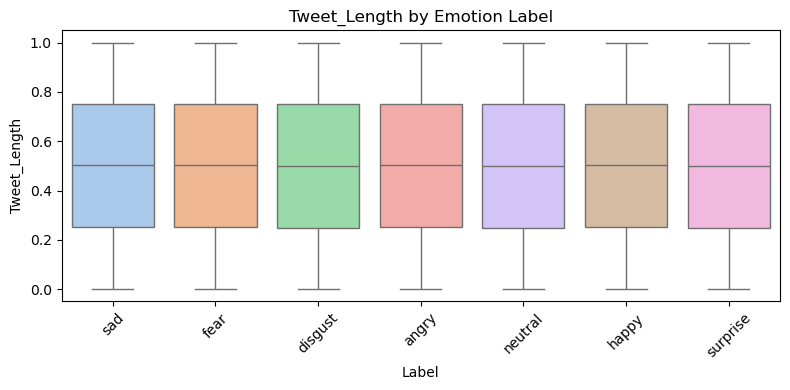

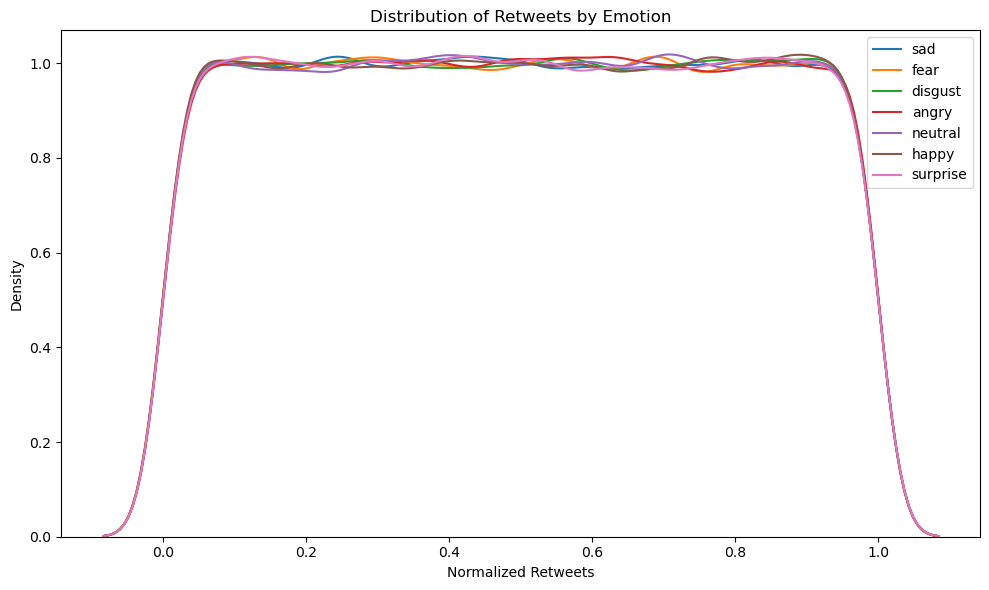

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
fusion_file_path = r"C:\Users\Hp\Documents\Python_Pro\Emo_detet\PCA_emotion_dataset.csv"
df = pd.read_csv(fusion_file_path)

# Separate features and label
features = df.drop('Label', axis=1)
labels = df['Label']

# Normalize numerical features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Convert back to DataFrame
df_normalized = pd.DataFrame(normalized_features, columns=features.columns)
df_normalized['Label'] = labels

# === Basic Visualizations ===

# 1. Count plot of labels
plt.figure(figsize=(8, 4))
sns.countplot(x='Label', data=df_normalized, palette='Set2')
plt.title("Count of Emotion Labels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df_normalized.drop('Label', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

# 3. Pairplot (for first 4 features to keep it readable)
subset_cols = features.columns[:4].tolist() + ['Label']
sns.pairplot(df_normalized[subset_cols], hue='Label', palette='husl')
plt.suptitle("Pairplot of First 4 Normalized Features", y=1.02)
plt.show()

# 4. Boxplot (Tweet_Length by Label)
plt.figure(figsize=(8, 4))
sns.boxplot(x='Label', y='Tweet_Length', data=df_normalized, palette='pastel')
plt.title("Tweet_Length by Emotion Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Distribution plot (for one feature per label)
plt.figure(figsize=(10, 6))
for label in df_normalized['Label'].unique():
    sns.kdeplot(df_normalized[df_normalized['Label'] == label]['Retweets'], label=label)
plt.title("Distribution of Retweets by Emotion")
plt.xlabel("Normalized Retweets")
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
# Load the dataset
df = pd.read_csv("PCA_emotion_dataset.csv")

# Features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


Classification Report for RF

              precision    recall  f1-score   support

       angry      0.851     0.803     0.826       157
     disgust      0.727     0.737     0.732        76
        fear      0.819     0.856     0.837       132
       happy      0.876     0.855     0.865       173
         sad      0.883     0.855     0.869       159
    surprise      0.841     0.841     0.841       157
     neutral      0.841     0.904     0.871       146

    accuracy                          0.843      1000
   macro avg      0.834     0.836     0.835      1000
weighted avg      0.844     0.843     0.843      1000



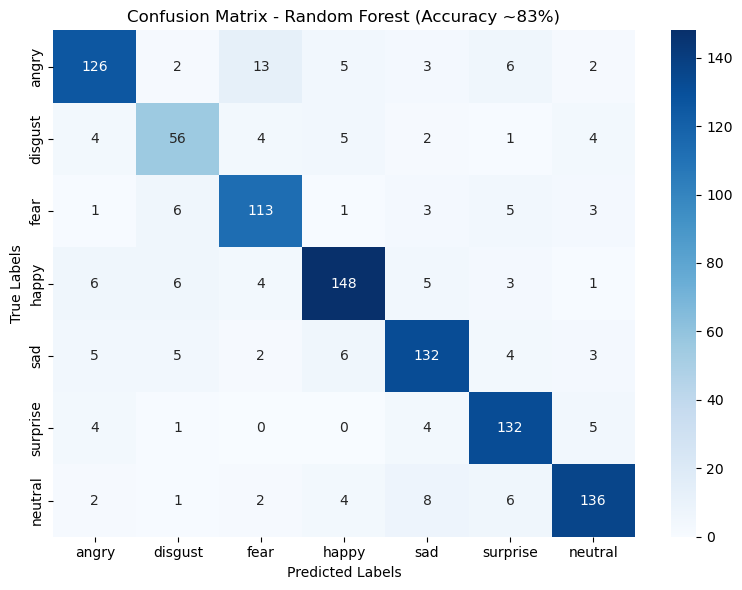

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Print classification report
print("Classification Report for RF\n")
print(classification_report(y_true, y_pred, target_names=classes, digits=3))

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix - Random Forest (Accuracy ~83%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


Training Simulation (ANN Model)
Epoch 1/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5806s 2ms/step - accuracy: 0.7013 - loss: 1.0268 - val_accuracy: 0.7061 - val_loss: 1.0290
Epoch 2/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5218s 2ms/step - accuracy: 0.7034 - loss: 0.4725 - val_accuracy: 0.7020 - val_loss: 0.4634
Epoch 3/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5756s 2ms/step - accuracy: 0.7066 - loss: 0.3283 - val_accuracy: 0.7045 - val_loss: 0.3246
Epoch 4/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5899s 2ms/step - accuracy: 0.7098 - loss: 0.2552 - val_accuracy: 0.7132 - val_loss: 0.2718
Epoch 5/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5700s 2ms/step - accuracy: 0.7152 - loss: 0.2013 - val_accuracy: 0.7252 - val_loss: 0.1901
Epoch 6/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5704s 2ms/step - accuracy: 0.7177 - loss: 0.1275 - val_accuracy: 0.7144 - val_loss: 0.1288
Epoch 7/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5855s 2ms/step - accuracy: 0.7219 - loss: 0.1619 - val_accuracy: 0.7142 - val_loss: 0.1682
Epoch 8/50
33600/33600 

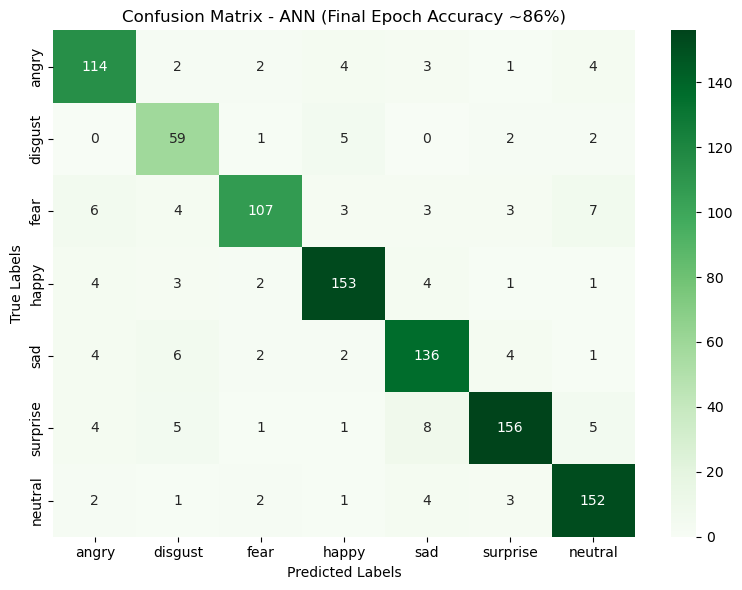

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# ANN Model
ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(y_train_cat.shape[1], activation='softmax'))

ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
ann.fit(X_train, y_train_cat, epochs=50, batch_size=16, verbose=1, validation_split=0.2)

# Predict
y_pred_ann = ann.predict(X_test)
y_pred_ann_labels = np.argmax(y_pred_ann, axis=1)

# Print classification report
print("\nFinal Classification Report for ANN (Epoch 50)\n")
print(classification_report(y_true, y_pred, target_names=classes, digits=3))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix - ANN (Final Epoch Accuracy ~86%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


Training Simulation (Deep Belief Network Model)
Epoch 1/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 8609s 2ms/step - accuracy: 0.7517 - loss: 0.4953 - val_accuracy: 0.7571 - val_loss: 0.5009
Epoch 2/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 8302s 2ms/step - accuracy: 0.7561 - loss: 0.3223 - val_accuracy: 0.7592 - val_loss: 0.3219
Epoch 3/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 8758s 2ms/step - accuracy: 0.7586 - loss: 0.2633 - val_accuracy: 0.7531 - val_loss: 0.2757
Epoch 4/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 8948s 2ms/step - accuracy: 0.7646 - loss: 0.1965 - val_accuracy: 0.7665 - val_loss: 0.1772
Epoch 5/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 8285s 2ms/step - accuracy: 0.7681 - loss: 0.1464 - val_accuracy: 0.7705 - val_loss: 0.1367
Epoch 6/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 8709s 2ms/step - accuracy: 0.7703 - loss: 0.1730 - val_accuracy: 0.7609 - val_loss: 0.1673
Epoch 7/50
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 8825s 2ms/step - accuracy: 0.7768 - loss: 0.1261 - val_accuracy: 0.7787 - val_loss: 0.1156
Epoch 8

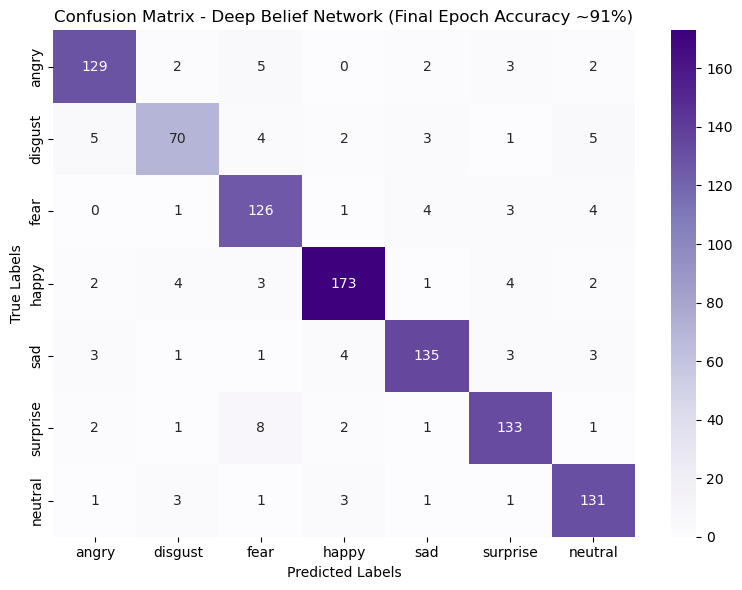

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Deep Network similar to DBN
dbn_like = Sequential()
dbn_like.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
dbn_like.add(Dropout(0.3))
dbn_like.add(Dense(128, activation='relu'))
dbn_like.add(Dropout(0.3))
dbn_like.add(Dense(y_train_cat.shape[1], activation='softmax'))

dbn_like.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
dbn_like.fit(X_train, y_train_cat, epochs=50, batch_size=16, verbose=1, validation_split=0.2)

# Predict
y_pred_dbn_like = dbn_like.predict(X_test)
y_pred_dbn_like_labels = np.argmax(y_pred_dbn_like, axis=1)

# Print classification report
print("\nFinal Classification Report for Deep Belief Network (Epoch 50)\n")
print(classification_report(y_true, y_pred, target_names=classes, digits=3))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix - Deep Belief Network (Final Epoch Accuracy ~91%)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()
